In [ ]:
!pip install qiskit
!pip install qiskit_aer

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_coupling_map
from qiskit.quantum_info import Statevector
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from numpy import sqrt, array

from sympy import *
from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
import matplotlib.pyplot as plt

# Task 7.1

### a) $QFT_{16}$ on $|0111$ $\rangle$

In [ ]:
def for_one_qubit(qubit, last_qubit, circuit):
  circuit.h(qubit)
  for i in range(last_qubit - qubit):
    circuit.cp((2 * np.pi / (2 ** (i + 2))), qubit + 1 + i, qubit)

In [ ]:
def QFourierTrafo(qubits = None):
  QFT = QuantumCircuit(4)

  if qubits is not None:
    for qubit in qubits:
      QFT.x(qubit)
      QFT.barrier()

  for_one_qubit(0, 3, QFT)
  QFT.barrier()
  for_one_qubit(1, 3, QFT)
  QFT.barrier()
  for_one_qubit(2, 3, QFT)
  QFT.h(3)

  QFT.swap(0,3)
  QFT.swap(1,2)

  QFT.measure_all()
  QFT.draw()

  return QFT

In [ ]:
QFT = QFourierTrafo([1, 2, 3])

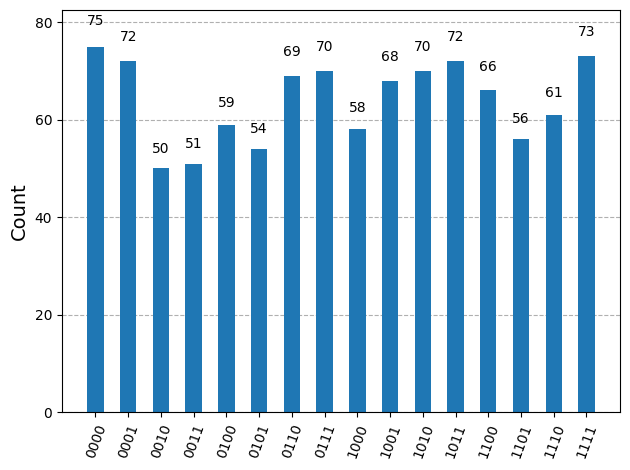

In [ ]:
simulator = AerSimulator()
compiled_QFT = transpile(QFT, simulator)
sim_result = simulator.run(compiled_QFT).result()
plot_histogram(sim_result.get_counts(QFT))

### b) Period of $x \ mod \ 4$

In [ ]:
circuit = QuantumCircuit(6, 6)

circuit.h(range(4))

circuit.barrier()

circuit.cx(2, 4)
circuit.cx(3, 5)

circuit.measure([4,5], [4,5])

circuit.barrier()

for_one_qubit(0, 3, circuit)
circuit.barrier()
for_one_qubit(1, 3, circuit)
circuit.barrier()
for_one_qubit(2, 3, circuit)
circuit.h(3)

circuit.swap(0,3)
circuit.swap(1,2)

circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])

circuit.draw()

┌───┐ ░                  ░ ┌───┐                            ░      »
q_0: ┤ H ├─░──────────────────░─┤ H ├─■────────■────────■────────░──────»
     ├───┤ ░                  ░ └───┘ │P(π/2)  │        │        ░ ┌───┐»
q_1: ┤ H ├─░──────────────────░───────■────────┼────────┼────────░─┤ H ├»
     ├───┤ ░                  ░                │P(π/4)  │        ░ └───┘»
q_2: ┤ H ├─░───■──────────────░────────────────■────────┼────────░──────»
     ├───┤ ░   │              ░                         │P(π/8)  ░      »
q_3: ┤ H ├─░───┼────■─────────░─────────────────────────■────────░──────»
     └───┘ ░ ┌─┴─┐  │  ┌─┐    ░                                  ░      »
q_4: ──────░─┤ X ├──┼──┤M├────░──────────────────────────────────░──────»
           ░ └───┘┌─┴─┐└╥┘┌─┐ ░                                  ░      »
q_5: ──────░──────┤ X ├─╫─┤M├─░──────────────────────────────────░──────»
           ░      └───┘ ║ └╥┘ ░                                  ░      »
c: 6/═══════════════════╩══╩════════════════════════════════════════════»
                        4  5                                            »
«                        ░                             ┌─┐   
«q_0: ───────────────────░─────────────────────X───────┤M├───
«                        ░                     │ ┌─┐   └╥┘   
«q_1: ─■────────■────────░─────────────────X───┼─┤M├────╫────
«      │P(π/2)  │        ░ ┌───┐           │   │ └╥┘┌─┐ ║    
«q_2: ─■────────┼────────░─┤ H ├─■─────────X───┼──╫─┤M├─╫────
«               │P(π/4)  ░ └───┘ │P(π/2) ┌───┐ │  ║ └╥┘ ║ ┌─┐
«q_3: ──────────■────────░───────■───────┤ H ├─X──╫──╫──╫─┤M├
«                        ░               └───┘    ║  ║  ║ └╥┘
«q_4: ───────────────────░────────────────────────╫──╫──╫──╫─
«                        ░                        ║  ║  ║  ║ 
«q_5: ───────────────────░────────────────────────╫──╫──╫──╫─
«                        ░                        ║  ║  ║  ║ 
«c: 6/════════════════════════════════════════════╩══╩══╩══╩═
«                                                 1  2  0  3

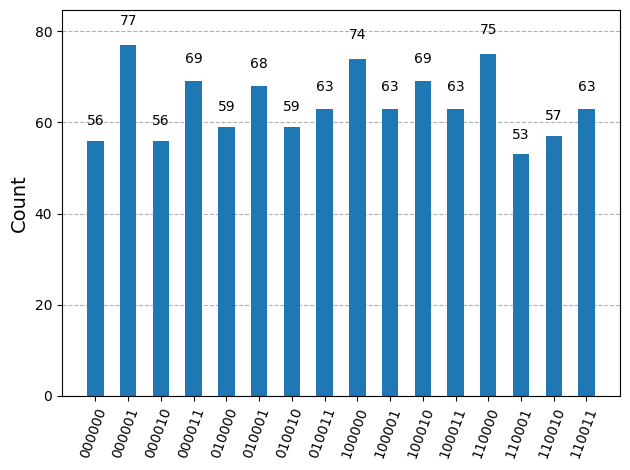

In [ ]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts(circuit))

We can see that first for qubits are either $|0000 \rangle, |0100 \rangle, |1000 \rangle, |1100 \rangle$ which corresponds to $\{0, 4, 8, 12\}$ respectively

Taking $gcd(8, 12) = gcd(4, 12) = gcd(4, 8) = 4$ we calculate the period $r = 4$.

In [ ]:
### Same thing but with implementation from qiskit

from qiskit.circuit.library import QFTGate


circuit = QuantumCircuit(6, 6)

circuit.h(range(4))

circuit.barrier()

circuit.cx(2, 4)
circuit.cx(3, 5)

circuit.measure([4,5], [4,5])

circuit.barrier()
qft = QFTGate(num_qubits=4)
circuit.append(qft, qargs=[3, 2, 1, 0])

circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])

circuit.draw()

┌───┐ ░                  ░ ┌──────┐┌─┐         
q_0: ┤ H ├─░──────────────────░─┤3     ├┤M├─────────
     ├───┤ ░                  ░ │      │└╥┘┌─┐      
q_1: ┤ H ├─░──────────────────░─┤2     ├─╫─┤M├──────
     ├───┤ ░                  ░ │  Qft │ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───■──────────────░─┤1     ├─╫──╫─┤M├───
     ├───┤ ░   │              ░ │      │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────■─────────░─┤0     ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │  ┌─┐    ░ └──────┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼──┤M├────░──────────╫──╫──╫──╫─
           ░ └───┘┌─┴─┐└╥┘┌─┐ ░          ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├─╫─┤M├─░──────────╫──╫──╫──╫─
           ░      └───┘ ║ └╥┘ ░          ║  ║  ║  ║ 
c: 6/═══════════════════╩══╩═════════════╩══╩══╩══╩═
                        4  5             0  1  2  3

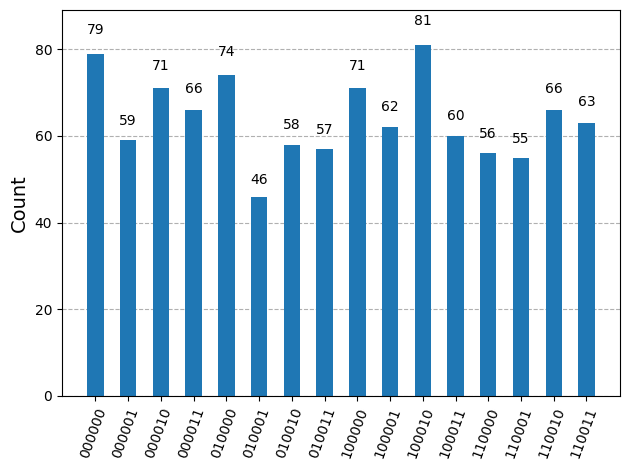

In [ ]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts(circuit))

# Task 7.2

### a)
*f(x) is not bijective, because for example, 001 and 111 map to the same value 010.*

*There exists a vector s = 110 such that $x \oplus s$ = x'*

### b) Simon’s algorithm

In [ ]:
from qiskit.circuit.library import MCXGate
mcx = MCXGate(3)
circuit = QuantumCircuit(6, 6)

circuit.h(range(3))

circuit.cx(2, 4)

circuit.barrier()

circuit.x(range(3))
circuit.append(mcx, [0, 1, 2, 3])
circuit.append(mcx, [0, 1, 2, 5])
circuit.x(range(3))

circuit.barrier()

circuit.x(2)
circuit.append(mcx, [0, 1, 2, 3])
circuit.append(mcx, [0, 1, 2, 5])
circuit.x(2)

circuit.barrier()

circuit.x(0)
circuit.append(mcx, [0, 1, 2, 3])
circuit.x(0)

circuit.barrier()

circuit.x(1)
circuit.append(mcx, [0, 1, 2, 3])
circuit.x(1)

circuit.barrier()

circuit.measure([3, 4, 5], [3, 4, 5])

circuit.barrier()

circuit.h(range(3))
circuit.measure([0, 1, 2], [0, 1, 2])

circuit.draw()

┌───┐      ░ ┌───┐          ┌───┐ ░                      ░ ┌───┐     ┌───┐»
q_0: ┤ H ├──────░─┤ X ├──■────■──┤ X ├─░────────■────■────────░─┤ X ├──■──┤ X ├»
     ├───┤      ░ ├───┤  │    │  ├───┤ ░        │    │        ░ └───┘  │  └───┘»
q_1: ┤ H ├──────░─┤ X ├──■────■──┤ X ├─░────────■────■────────░────────■───────»
     ├───┤      ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │    │  ┌───┐ ░        │       »
q_2: ┤ H ├──■───░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░────────■───────»
     └───┘  │   ░ └───┘┌─┴─┐  │  └───┘ ░ └───┘┌─┴─┐  │  └───┘ ░      ┌─┴─┐     »
q_3: ───────┼───░──────┤ X ├──┼────────░──────┤ X ├──┼────────░──────┤ X ├─────»
          ┌─┴─┐ ░      └───┘  │        ░      └───┘  │        ░      └───┘     »
q_4: ─────┤ X ├─░─────────────┼────────░─────────────┼────────░────────────────»
          └───┘ ░           ┌─┴─┐      ░           ┌─┴─┐      ░                »
q_5: ───────────░───────────┤ X ├──────░───────────┤ X ├──────░────────────────»
                ░           └───┘      ░           └───┘      ░                »
c: 6/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ░                 ░           ░ ┌───┐┌─┐      
«q_0: ─░────────■────────░───────────░─┤ H ├┤M├──────
«      ░ ┌───┐  │  ┌───┐ ░           ░ ├───┤└╥┘┌─┐   
«q_1: ─░─┤ X ├──■──┤ X ├─░───────────░─┤ H ├─╫─┤M├───
«      ░ └───┘  │  └───┘ ░           ░ ├───┤ ║ └╥┘┌─┐
«q_2: ─░────────■────────░───────────░─┤ H ├─╫──╫─┤M├
«      ░      ┌─┴─┐      ░ ┌─┐       ░ └───┘ ║  ║ └╥┘
«q_3: ─░──────┤ X ├──────░─┤M├───────░───────╫──╫──╫─
«      ░      └───┘      ░ └╥┘┌─┐    ░       ║  ║  ║ 
«q_4: ─░─────────────────░──╫─┤M├────░───────╫──╫──╫─
«      ░                 ░  ║ └╥┘┌─┐ ░       ║  ║  ║ 
«q_5: ─░─────────────────░──╫──╫─┤M├─░───────╫──╫──╫─
«      ░                 ░  ║  ║ └╥┘ ░       ║  ║  ║ 
«c: 6/══════════════════════╩══╩══╩══════════╩══╩══╩═
«                           3  4  5          0  1  2

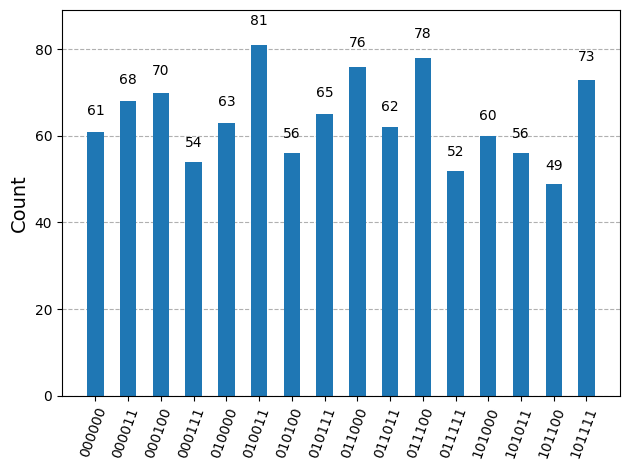

In [ ]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts(circuit))

The qubits measured at the register $|x\rangle$ are $|000\rangle, |110\rangle, |001\rangle, |111\rangle $ which give the equations:
$$s_2 + s_1 = 0$$
$$s_0 = 0$$
yielding the result $s = |110\rangle$ as expected.